<a href="https://colab.research.google.com/github/boxty123/ComputerVision/blob/main/CV_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#yolov5

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt
!curl -L "https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip" -o coco128.zip
!unzip coco128.zip

Cloning into 'yolov5'...
remote: Enumerating objects: 17493, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 17493 (delta 1), reused 0 (delta 0), pack-reused 17490 (from 3)
Receiving objects: 100% (17493/17493), 16.54 MiB | 12.57 MiB/s, done.
Resolving deltas: 100% (11989/11989), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:0

In [ ]:
!python train.py --img 640 --batch 16 --epochs 10 --data coco128.yaml --weights yolov5s.pt --project runs/train --name coco128_yolov5s --exist-ok

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-06-17 15:31:17.888069: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750174278.174986    1001 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750174278.251298    1001 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

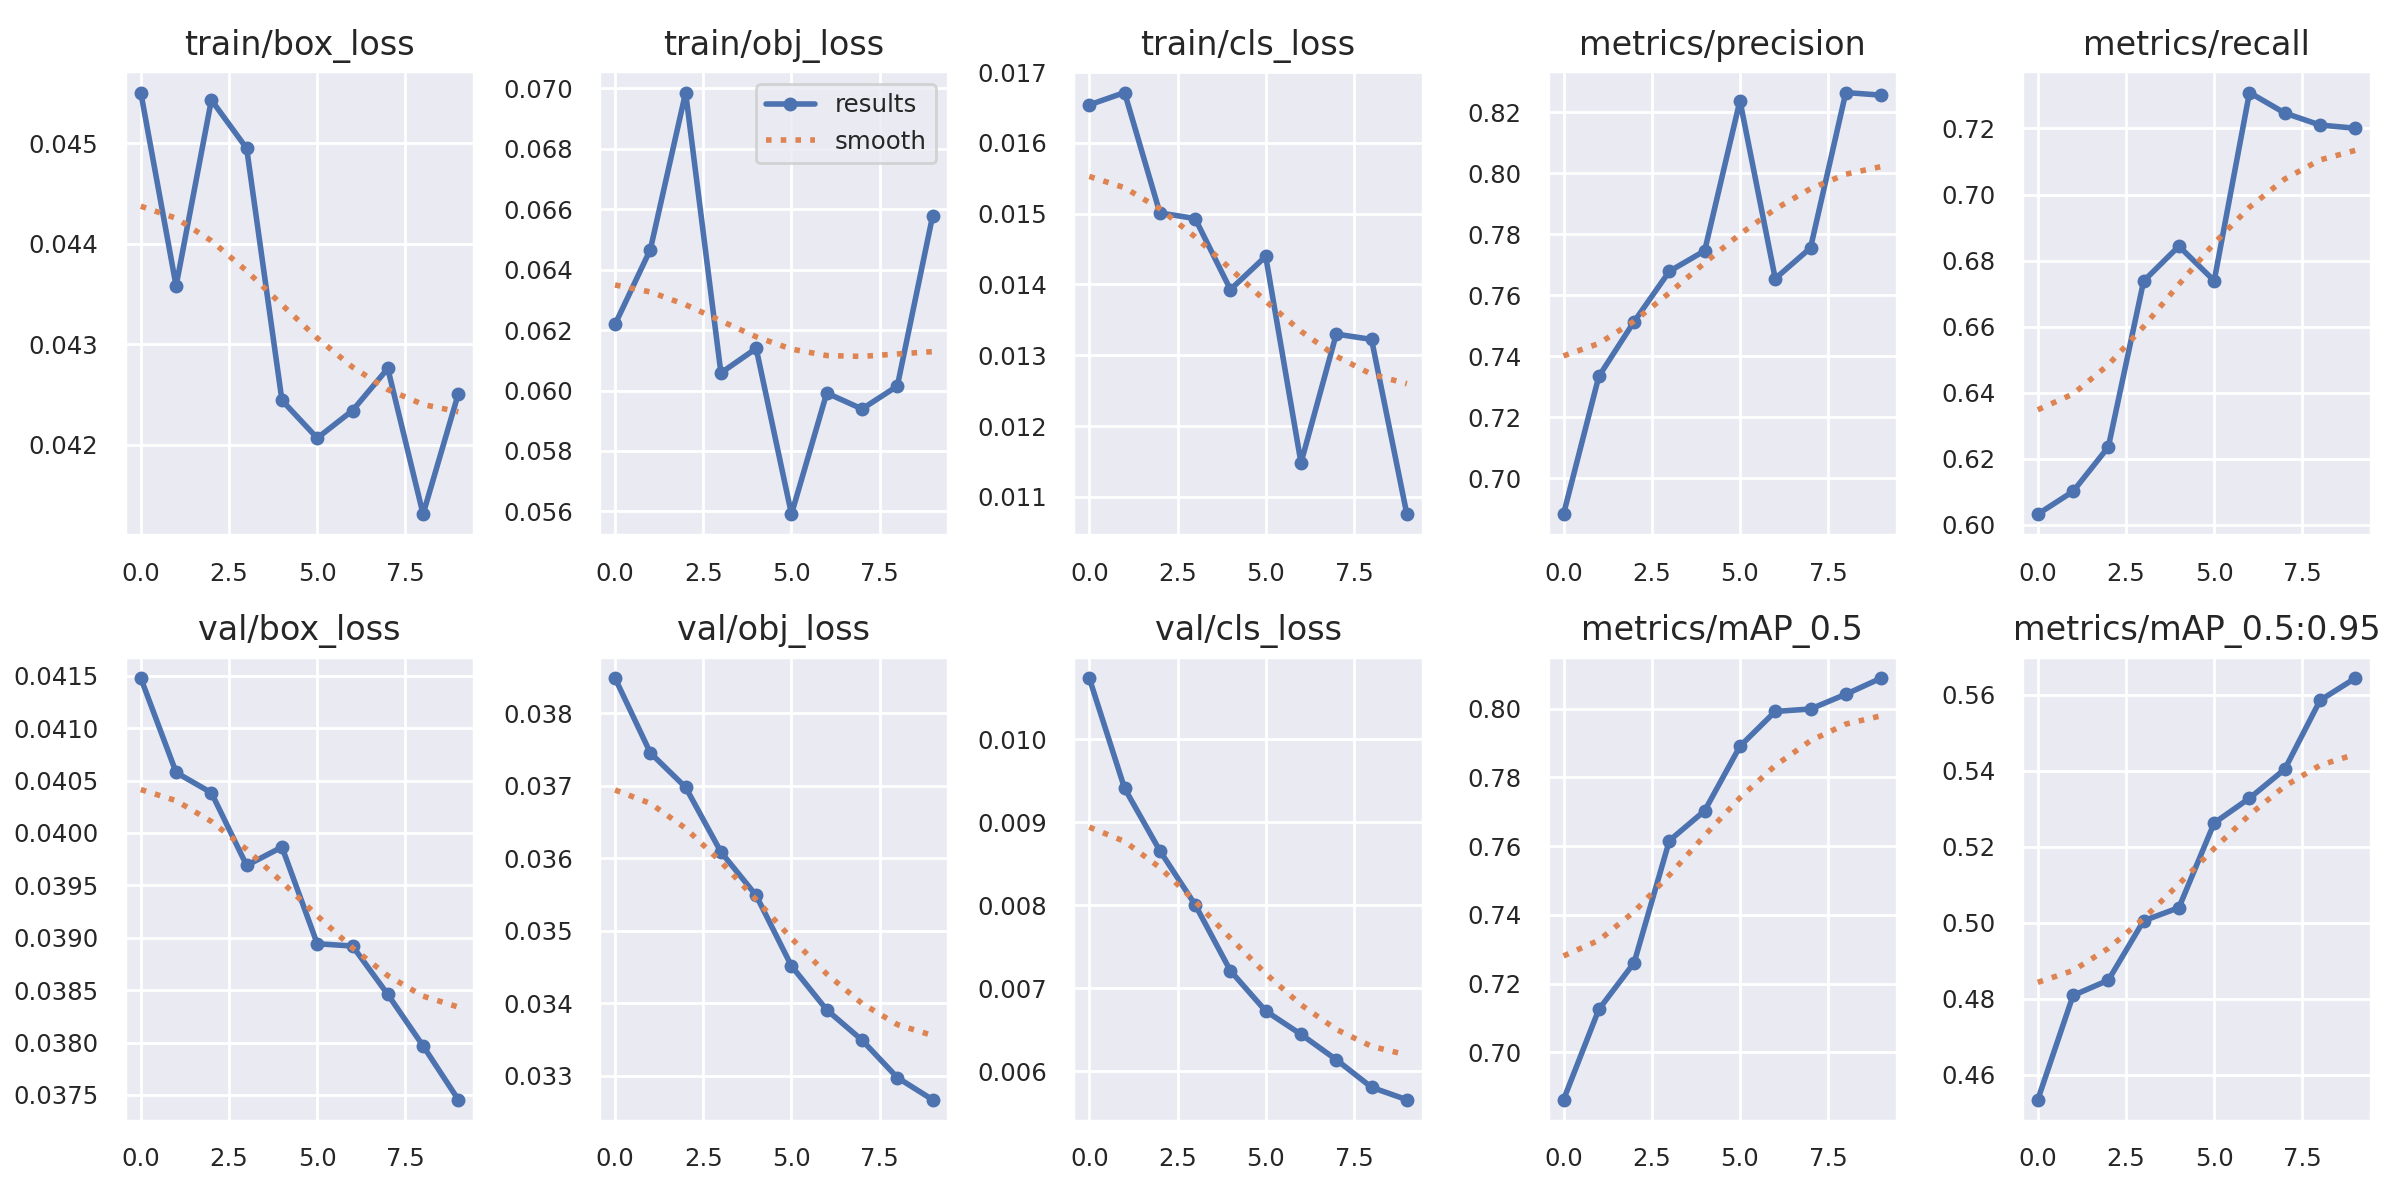

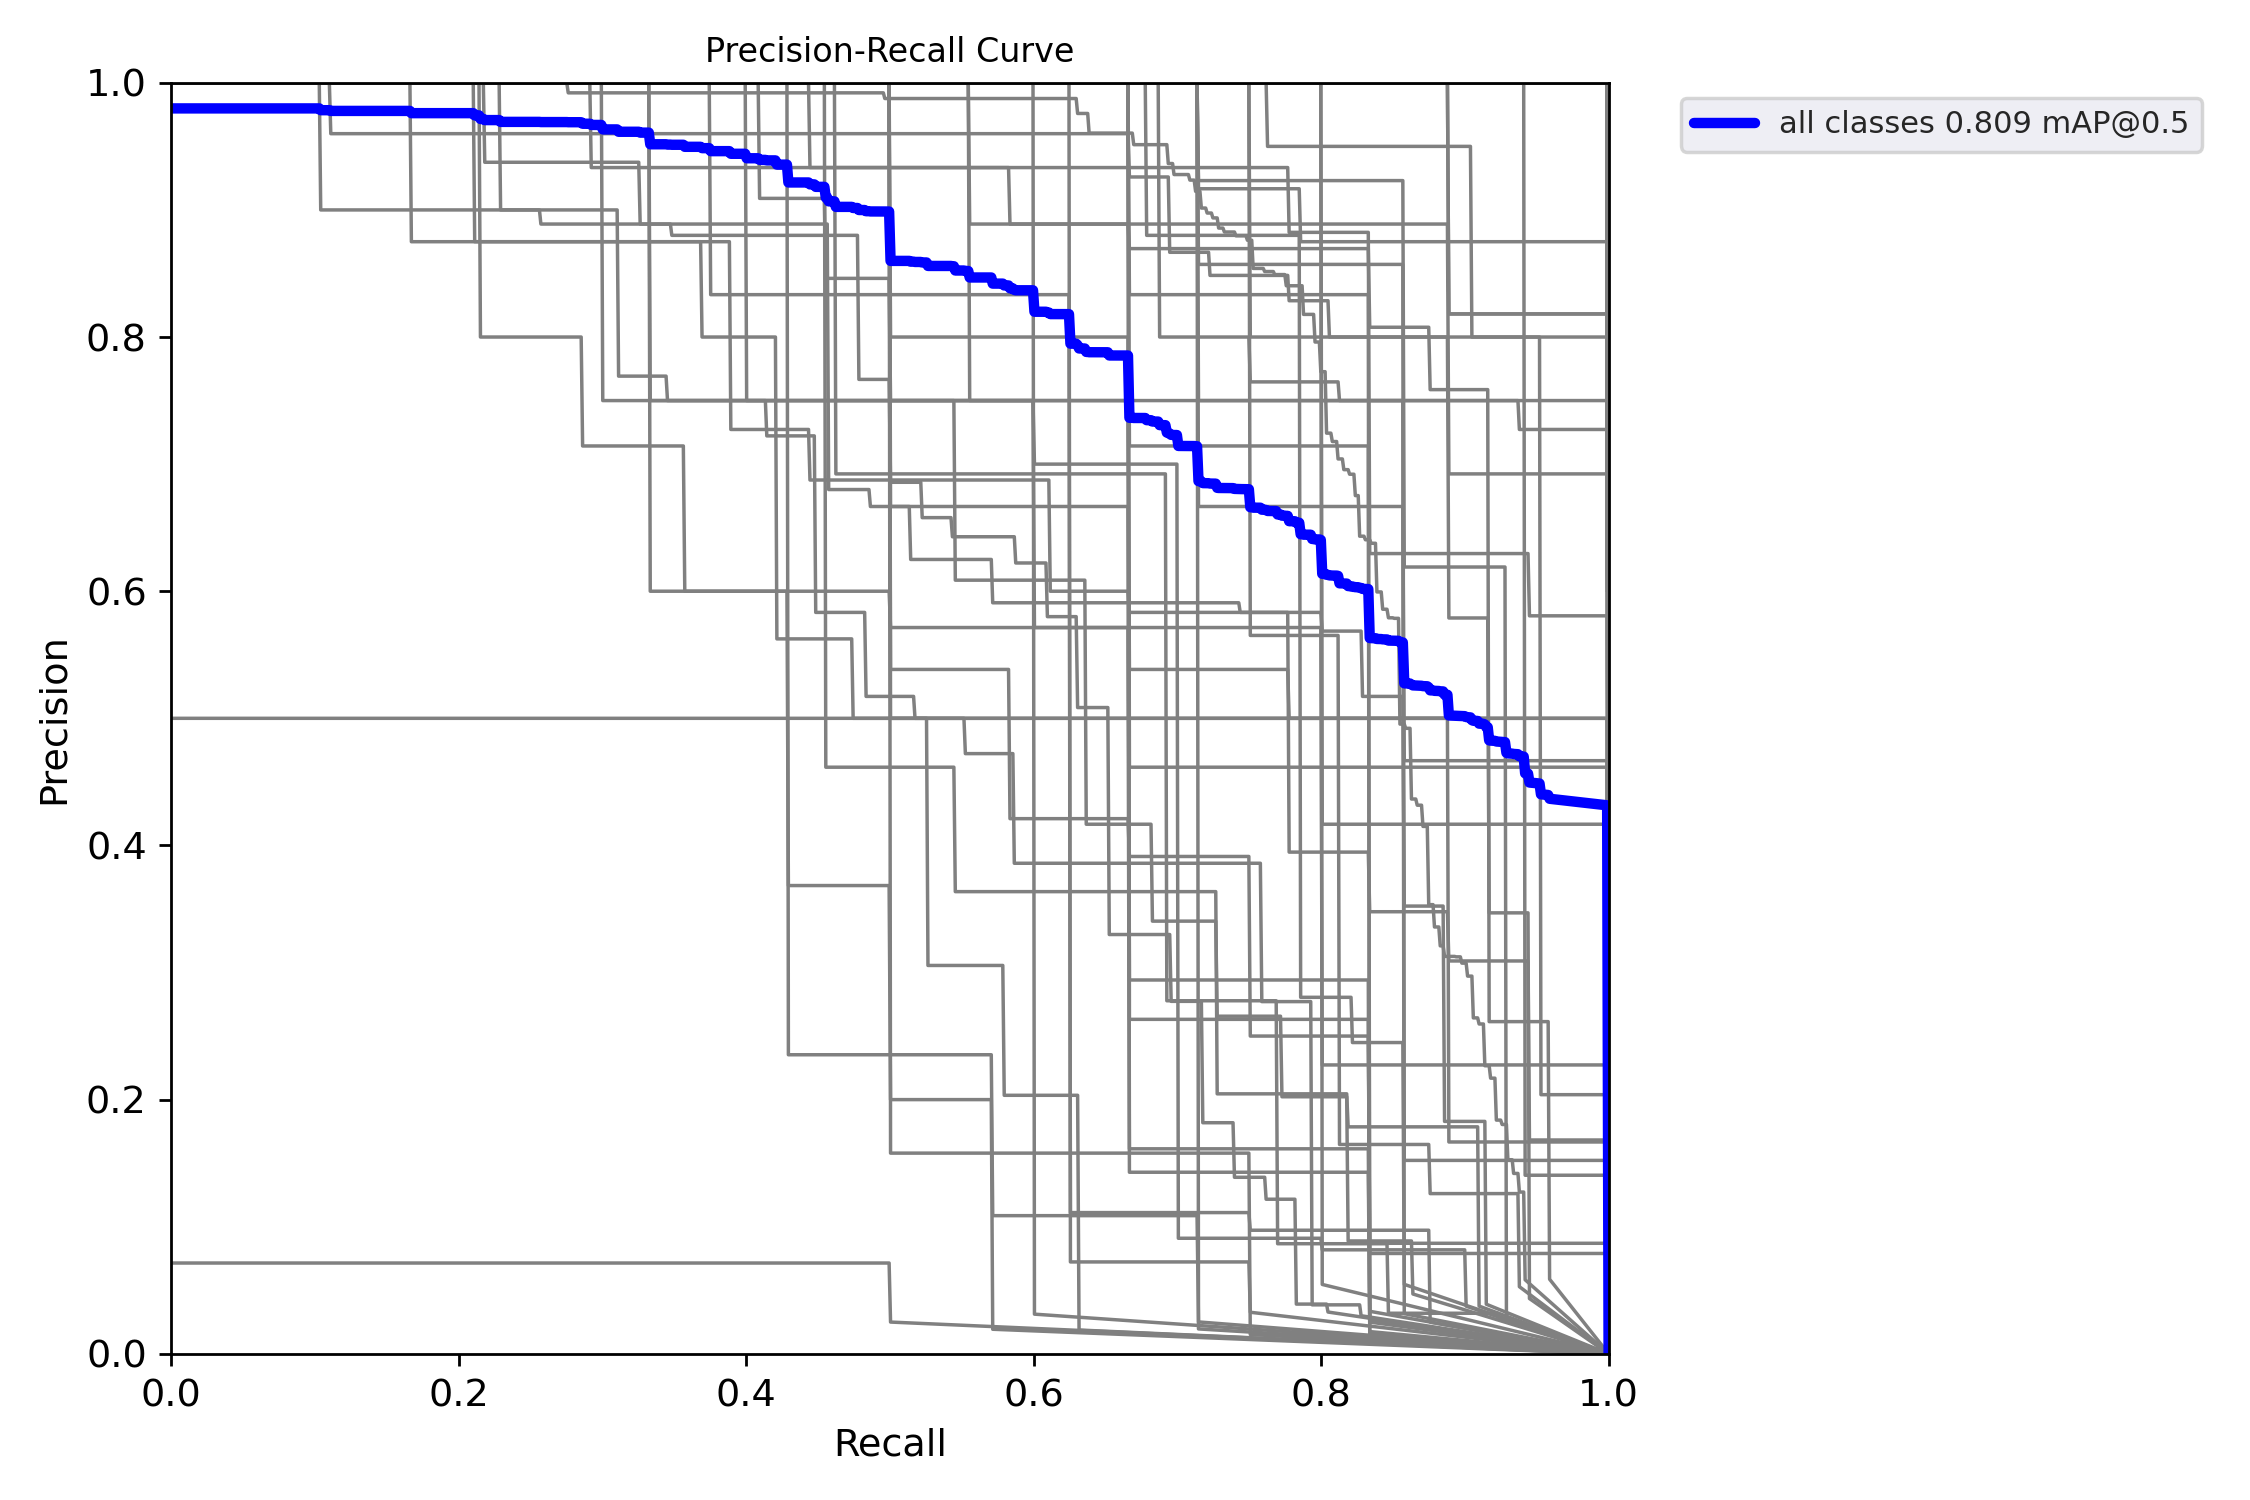

In [ ]:
from IPython.display import Image, display

# mAP, PR Curve 시각화
display(Image(filename='runs/train/coco128_yolov5s/results.png'))  # loss + mAP + PR curve 그래프
display(Image(filename='runs/train/coco128_yolov5s/PR_curve.png'))  # PR Curve만 별도 확인


#속도측정

In [ ]:
import time

start = time.time()
!python detect.py --weights runs/train/coco128_yolov5s/weights/best.pt \
                  --img 640 --conf 0.25 \
                  --source data/images \
                  --project runs/detect --name tmp \
                  --save-txt --save-conf
end = time.time()

print(f"Total inference time: {end - start:.2f} seconds")


detect: weights=['runs/train/coco128_yolov5s/weights/best.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=tmp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/10 /content/yolov5/data/images/000000000001.jpg: 480x640 2 cars, 1 truck, 1 parking meter, 44.2ms
image 2/10 /content/yolov5/data/images/000000000016.jpg: 640x480 2 persons, 1 sports ball, 1 baseball bat, 50.2ms
image 3/10 /content/yolov5/data/images/000000000019.jpg: 448x640 2 cows, 49.5ms
image 4/10 /

Detection 결과

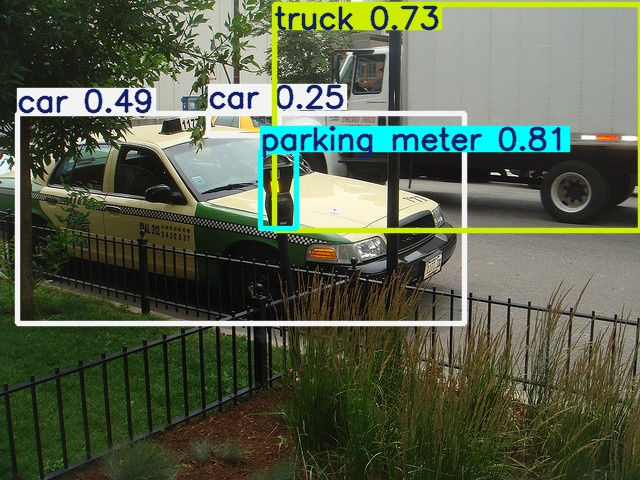

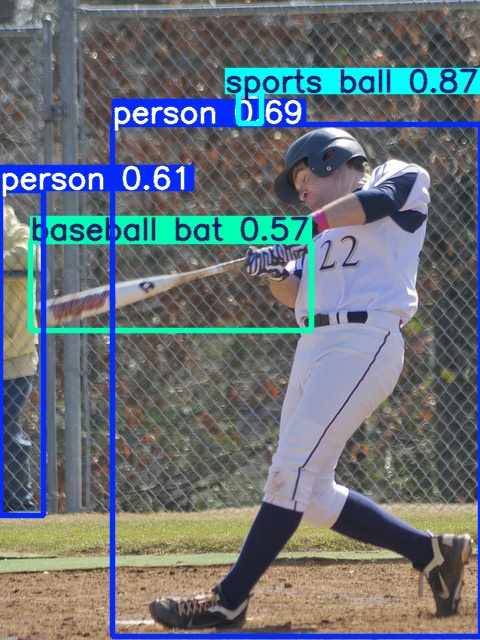

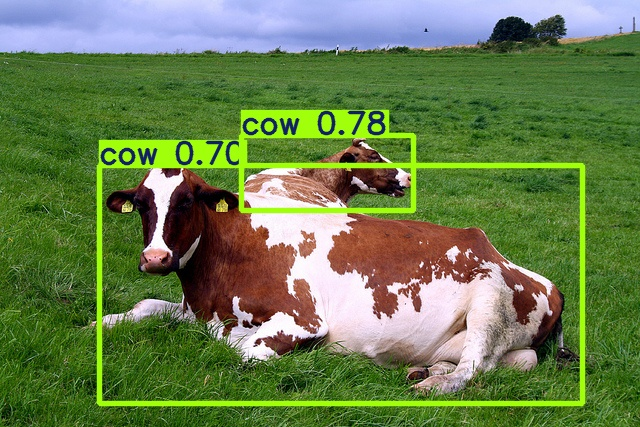

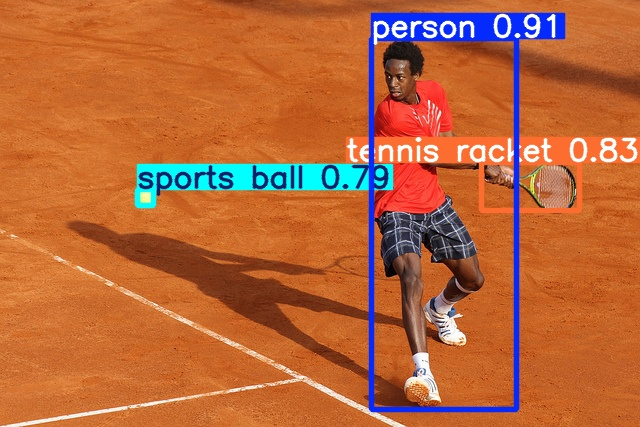

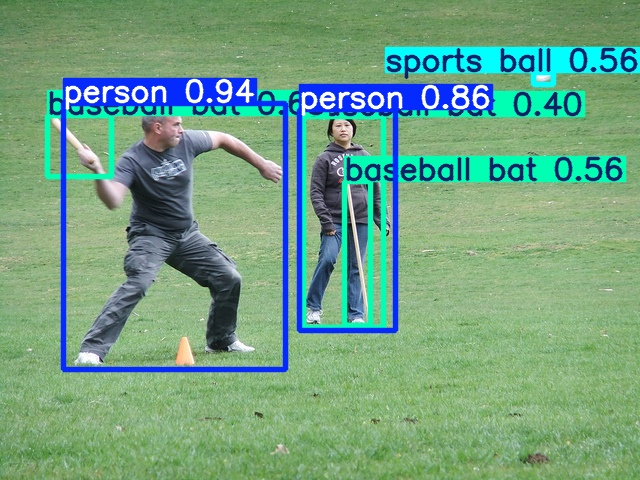

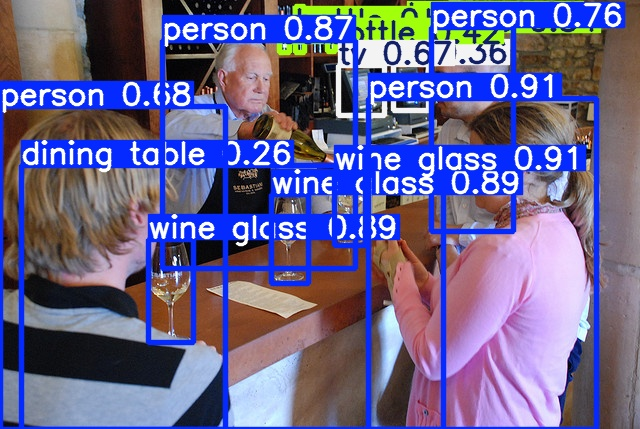

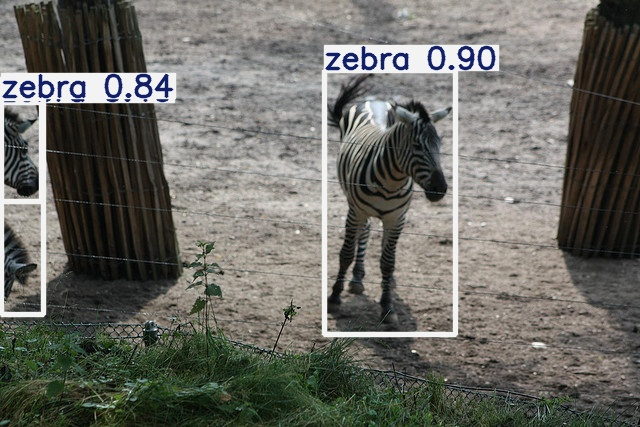

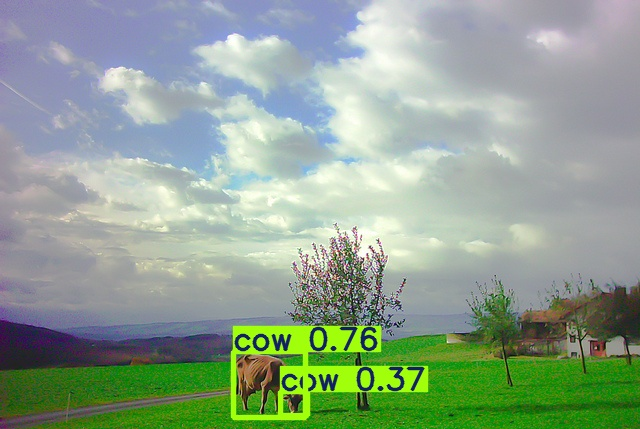

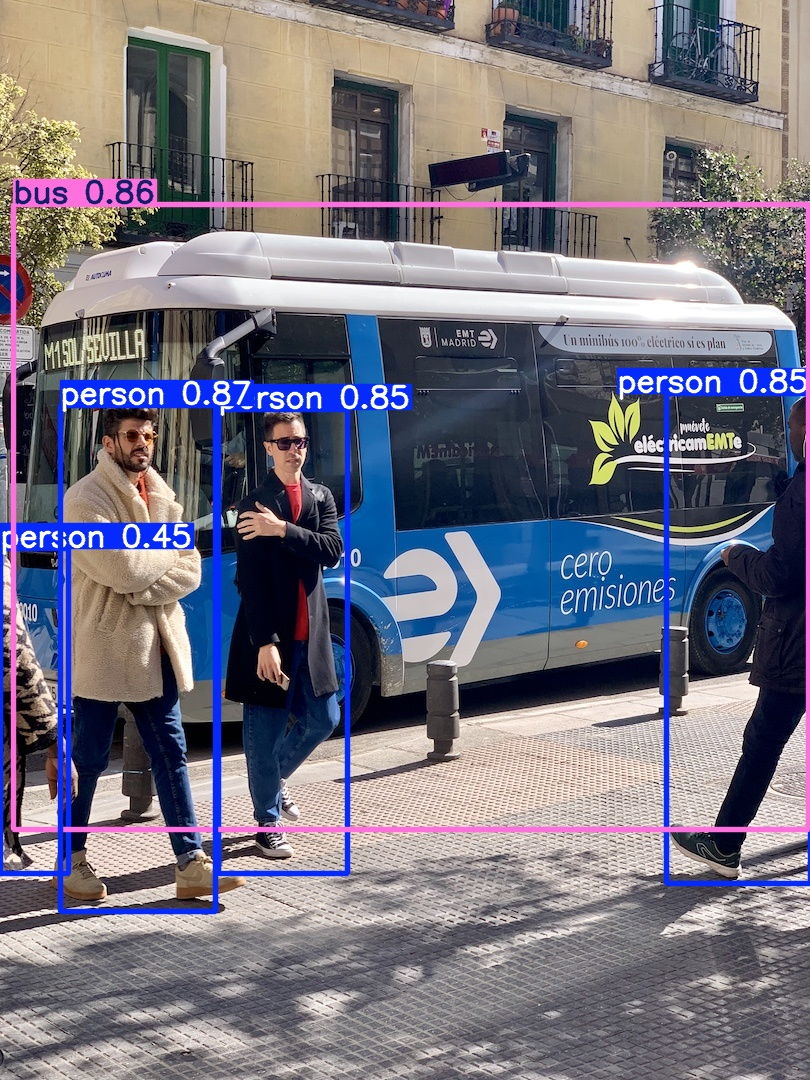

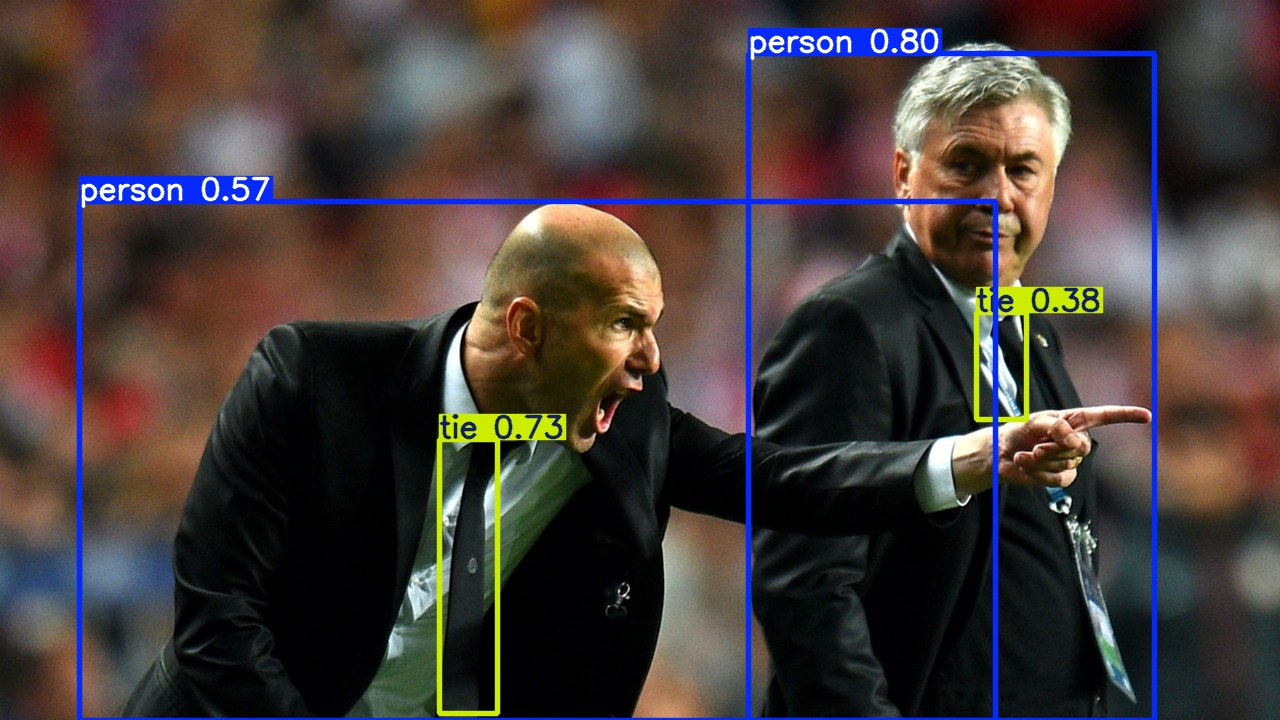

In [ ]:
# 탐지된 이미지 시각화
from IPython.display import Image, display
from glob import glob

result_imgs = sorted(glob('runs/detect/tmp/*.jpg'))[:]
for img_path in result_imgs:
    display(Image(filename=img_path))
